In [1]:
from scipy import signal
from matplotlib import pyplot as plt  
import numpy as np
import warnings
warnings.filterwarnings('ignore') #关闭警告信息

In [2]:
N=24
f1 = [1,0,0,0,0,0,-1]
f2 = [1,1,1,1,1,1,1,1]
f3 = [1,1,1,1,1,1,1,1,1,1]
f4 = np.convolve(f1,f2)
f = np.convolve(f4,f3)
w,h = signal.freqz(f,worN=np.linspace(0,np.pi,1000))

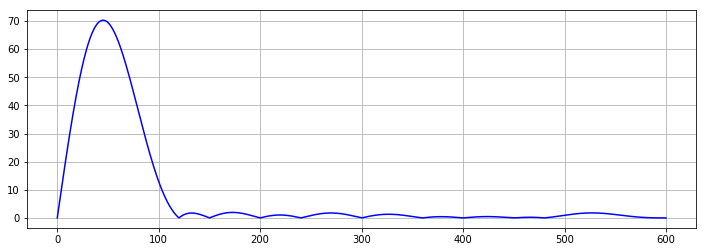

In [3]:
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.plot(1200*w/2/np.pi,(np.abs(h)),'b')
ax1.grid()
plt.show()

In [ ]:
abs(h[79:85])

In [ ]:
1200*w[79:85]/2/np.pi

In [27]:
t = np.array([ts for ts in np.arange(0,0.1,1./1200)])
x = 30*np.exp(-t)+np.sin(2*np.pi*50*t+0)#+3*np.sin(2*np.pi*250*t+np.pi/3)

In [28]:
y = signal.lfilter(f,1,x)

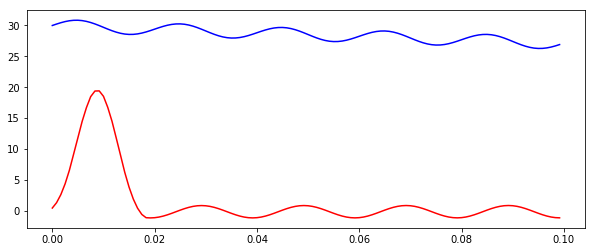

In [29]:
plt.figure(figsize=[10,4])
plt.plot(t,x,'b')
plt.plot(t,y/69.5,'r')
plt.show()

In [14]:
class FIR():
    def __init__(self):
        return
    
    def FreResponse(self):
        """
        滤波器的频率响应
        signal.freqz(b,a,worN)
        b:时域滤波器分子系数 z变换分子 b[0]+b[1]z^(-1)+b[2]z^(-2)...
        a:为1 分母整体为1，此时滤波器为FIR
        worN:绘制的点数，默认用fs/2归一话到角频率
        也就是说，worN=np.linspace(0,np.pi,1000)时，返回值w为角频率
        如果要得到f，则f/2/np.pi
        但此时得到的f是按照fs/2归一化的，也就是说得到的频率区间是[0,0.5]
        用fs乘以f即可得到 一半采样频率的 幅频曲线
        ---------
        这个函数是用来观察设计好的滤波器的频率响应
        得到FIR的z变换形式，可以在这里观察频率特性
        """
        fs=1200.
        fig,ax1 = plt.subplots(figsize=(12,4))
        #级联的滤波器，在频域内 是乘的关系 
        # h = h1*h2*h3
        #因此，在时域内就是卷积的关系
        #如果知道滤波器h1 h2 h3 对应时域内f1 f2 f3 的系数，那么将其系数卷积
        #就得到了这个级联滤波器时域内的形式
        f1 = [1,0,0,0,0,0,-1] # y1 = x(n)-x(n-6)
        f2 = [1,1,1,1,1,1,1,1] # y1(n)+y1(n-1)+y1(n-2)....y1(n-7)
        f3 = [1,1,1,1,1,1,1,1,1,1] #y = y2(n)+y2(n-1)+y2(n-2)....y2(n-9)
        f4 = np.convolve(f1,f2)
        f = np.convolve(f4,f3) #最终得到级联滤波器的FIR系数
        #freqz(b,a)
        w,h = signal.freqz(f,worN=np.linspace(0,np.pi,1000))
        ax1.plot(fs*w/2/np.pi,(np.abs(h)),'b')
        ax1.grid()
        plt.show()
        return

    def Casca3FIR(self,samPoints):
        """
        3级联滤波 
        一级：1阶差分(N1=6) y1 = x(n)-x(n-6)
        二级：8阶积分(N2=7) y2 = y1(n)+y1(n-1)+y1(n-2)....y1(n-7)
        三级:10阶积分(N3=9) y = y2(n)+y2(n-1)+y2(n-2)....y2(n-9)
        输出一个y点需要23（N1+N2+N3+1）个点
        也就是说给定N个点经过滤波后会得到N-(N1+N2+N3)+1 因为第23个点正好输出一个y
        
        该滤波器可以滤处直流分量和高于100Hz的高频分量
        差不多相当于低通滤波器
        但是对于衰减直流分量 还是有一定的误差，特别是衰减直流分量很大的时候
        """
        N1 = 6 #
        N2 = 7#
        N3 = 9
        y1 = []
        y2 = []
        y = []
        for index in np.arange(0,len(samPoints)):
            if index >= N1:
                y1.append(samPoints[index]-samPoints[index-N1])
                if len(y1) >= (N2+1):
                    y2.append(sum(y1[-N2-1:]))
                    if len(y2) >= (N3+1):
                        y.append(sum(y2[-N3-1:]))
        #这个滤波器会将50Hz频率放大69.5倍
        #因而除以69.5，可以得到基频分量
        yBase = np.array(y)/69.5
        return yBase

In [15]:
obj = FIR()
my = obj.Casca3FIR(x)

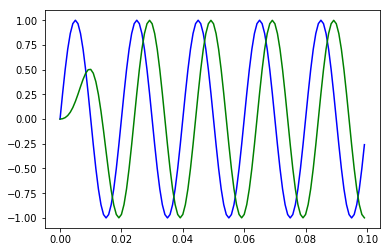

In [16]:
plt.plot(t,x,'b')
plt.plot(t,y/69.5,'green')
plt.show()

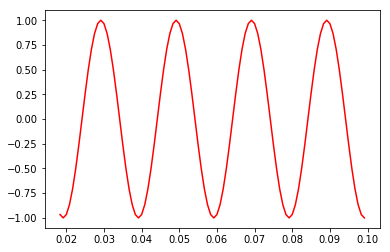

In [10]:
plt.plot(t[22:],my/69.3,'r')
plt.show()

In [ ]:
"""
def testZ(z):
    num = z**5+z**4+z**3+z**2+z+1
    denom = z
    return num/denom

x = np.linspace(0,1200,200)
plt.figure(figsize=(12,4))
plt.plot(x,np.abs(testZ(np.exp(1j*x))))
plt.show()

"""